# Demonstration workflow for *openQmin* (+ *openViewMin*) entirely in a Jupyter notebook

First, let's define some basic global properties.

In [1]:
Lx = 50 # system size
Ly = 50
Lz = 50
S = 0.53 # default uniaxial order for all sites

Next, we'll create a *boundaryFile* (in this case describing a spherical colloid and a planar wall).

In [2]:
import boundaryHelper as bh

bdyfilename = '../sphere_and_wall.txt'

sc = bh.Scene(Lx,Ly,Lz) # make a Scene
anch1= bh.OrientedAnchoringCondition(strength=5.3, S0=0.53) # first anchoring condition
co = bh.SphericalColloid(anch1, ((Lx-1)/2, (Ly-1)/2, (Lz-1)/2), 10) # colloid boundary object
anch2 = bh.DegeneratePlanarAnchoringCondition(strength=10, S0=0.53) # second anchoring condition
wall = bh.Wall(anch2, "x", 5) # wall boundary object, normal to x, positioned at x=5
sc.boundary_objects = [co, wall] # put objects in Scene
sc.to_file(bdyfilename) # write Scene to text file

Optionally, we can define an initial director field, which we save to a file for import by *openQmin* as *initialConfigurationFile*.

In [3]:
import initHelper as ih

initfilename="../my_init_file" # file prefix for where to save output

nx_function_string = "cos(rho*2*pi/50)*cos(phi)" 
ny_function_string = "cos(rho*2*pi/50)*sin(phi)" 
nz_function_string = "sin(rho*2*pi/50)"

ih.create_init_state(
    Lx, Ly, Lz, S, initfilename, 
    nx_function_string, ny_function_string, nz_function_string
)

Configuration has been saved to ../my_init_file_x0y0z0.txt.


Now we can use *runHelper.py* to generate the command-line call to *openQmin* (with any changes we'd like to make to the default parameters) and then run it as a shell command from within Jupyter.

In [10]:
import runHelper as rh

rh.params['initialConfigurationFile'] = initfilename
rh.params['boundaryFile'] = bdyfilename
rh.params['saveFile'] = '../demo_run'
rh.params['iterations'] = 2000

runcmd = rh.get_runcmd() # generate command-line string
!{runcmd} # run as shell command

loading state...
reading file with 2 object(s)
reading boundary type 0 with 5.300000 0.530000 and 4224 entries
object with 4224 sites created
there are now 1 boundary objects known to the configuration... last object had 4224 sites and 1104 surface sites 
reading boundary type 1 with 10.000000 0.530000 and 2500 entries
object with 2500 sites created
there are now 2 boundary objects known to the configuration... last object had 2500 sites and 5000 surface sites 
step 999 max force:7.72e-05 	power: 4.49	 alpha 0.99	 dt 0.0475 	 scaling 0.054 
step 1999 max force:2.08e-05 	power: 0.727	 alpha 0.99	 dt 0.0475 	 scaling 0.166 
fire finished: step 2000 max force:2.1e-05 	power: 1.23	 alpha 0.99	 dt 0.045125 	scaling 0.211 
-26215.295117 1003.632189 93.304334 0.000000 0.000000
minimized to 2.09632e-05	 E=-0.212371	


Finally, we'll visualize the result using *openViewMin*. Unfortunately, *openViewMin* can't run interactively inside a Jupyter notebook (I recommend using the [xpra](https://xpra.org/) remote display software). But if you want to take a quick look at a static snapshot in the Jupyter notebook, you can do this:

QStandardPaths: XDG_RUNTIME_DIR not set, defaulting to '/tmp/runtime-dbeller'


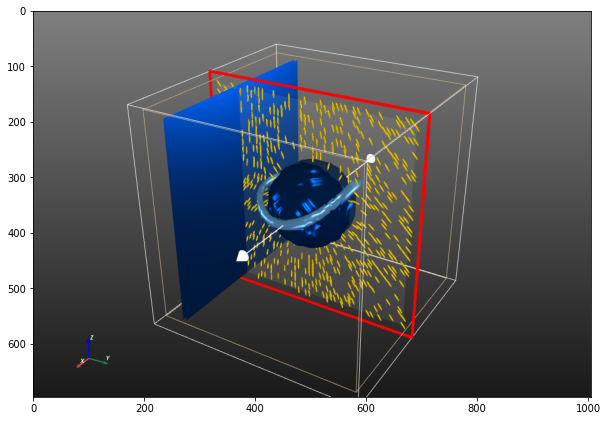

In [1]:
import sys
sys.path.append('../../openviewmin') # replace with your own path to openViewMin
import openViewMin
import matplotlib.pyplot as plt

openViewMin.start_xvfb() # start a virtual frame buffer
ovm_plot = openViewMin.NematicPlot('../demo_run_x0y0z0.txt') # load the openQmin result

# Optionally make changes using PyVista or openViewMin-specific methods
ovm_plot.camera.position = (150,100,100) 
ovm_plot.update_actor('defects', filter_kwargs={"isosurfaces":[0.3]})

# Plot bitmap of openViewMin screenshot
fig = plt.figure(figsize=(10,10))
plt.imshow(ovm_plot.screenshot()) 
plt.show()
fig.savefig('demo_run_vis.png')